**Import packages and load the data**

In [1]:
#Imports and loads
import pandas as pd
import pickle
import numpy as np

with open("data.pickle", "rb") as f:
    data = pickle.load(f)
    
images = data["images"]
labels = data["labels"]
n_classes = 5
labels_text = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat"]

# Using a Random Forest Classifier to detect the most differentiative pixels.

Using a Random Forest Classifier, the most (25) important pixels are:
 [649 442 582 686 714 274 593 518 462 610 219 162 658 574 538 481 490 509
 190 602 630 228  47 546 117]


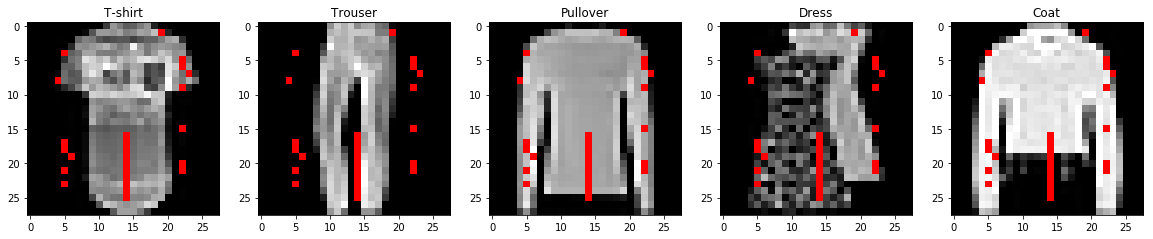

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#Split into train-test.
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=2017, stratify=labels)

clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)

importance = clf.feature_importances_

#S'agafen 25 píxels per obtenir una millor claredat, tot i que amb 10 seria suficient.
ind = np.argpartition(importance, -25)[-25:]
print("Using a Random Forest Classifier, the most (25) important pixels are:\n", ind)
 
fig, ax = plt.subplots(1, 5, figsize=(20,20))
idxs = [np.where(labels == i)[0] for i in range(5)]

for i in range(5):
    k = np.random.choice(idxs[i])
    d = images[k].copy()
    d[ind] = np.nan
    d = d.reshape(28,28)
    cmap = plt.cm.gray
    cmap.set_bad((1, 0, 0, 1))
    ax[i].imshow(d, cmap=cmap)
    ax[i].set_title("{}".format(labels_text[i]))

# Using a Convolutional Neural Network to classify the images

In [3]:
#Using a Convolutional Neural Network to classify the images
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import keras

num_classes = 5
batch_size = 32
epochs = 400
sgd = SGD(lr=0.01)


x_train = X_train.reshape(4000,28,28,1)
x_test = X_test.reshape(1000,28,28,1)

# convert class vectors to binary class matrices
y_train_b = keras.utils.to_categorical(y_train, num_classes)
y_test_b = keras.utils.to_categorical(y_test, num_classes)

#Model
model = Sequential()
model.add(Conv2D(28, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))

#Compile
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

#Fit
model.fit(x_train, y_train_b,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0)

score = model.evaluate(x_test, y_test_b, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

c:\python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Test loss: 0.3114091112017632
Test accuracy: 0.899


# Confusion Matrix

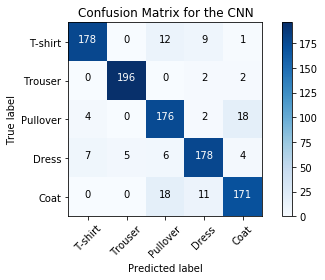

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

#Funció per visualitzar la matriu de confusió
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, [np.argmax(p) for p in model.predict(x_test, verbose=0)])
plot_confusion_matrix(cnf_matrix, classes=labels_text, title='Confusion Matrix for the CNN')